<a href="https://colab.research.google.com/github/LaimengEung/inf-604-data-analysis-i-repo/blob/master/Copy_of_Lab2_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab2: Univariate Analysis**

**Course**: **INF-604: Data Analysis** <br>
**Lecturer**: **Sothea HAS, PhD**

-----

**Objective:** In this lab, you will explore the columns of a dataset according to their data types. Your task is to employ various techniques, including statistical values and graphical representations, to understand the dataset before conducting deeper analysis.

- Or you can work directly with `Google Colab` here: [Lab2_Univariate_Analysis.ipynb](https://colab.research.google.com/drive/1zSadIatlKFlzgJr2thsEoEb-yq3-r-7h?usp=sharing).


-----


# 1. `Food Delivery` Dataset

This dataset contains food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research. Read and load the data from kaggle: [Food Delivery Dataset](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction/data).

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

# Import data
import pandas as pd
data = pd.read_csv(path + "/Food_Delivery_Times.csv")
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


**A.** What's the dimension of the data? Which variables are considered quantitative and which are qualitative?

> **Answer:**  
> - The dimension of the data is (1000, 9): 1000 rows and 9 columns
> - In this dataset, variables with float and int data types are considered quantitative, and variables with object type are considered qualitative.

In [2]:
data.shape

(1000, 9)

In [3]:
data.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [4]:
data = data.drop(columns='Order_ID')

In [5]:
data.dtypes

Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [7]:
# Select the type using 'select_dtypes()'
data.select_dtypes(include='number').columns.to_list()

print(f"Quantitative data are in columns: {data.select_dtypes(include='number').columns.to_list()}")
print(f"Qualitative data are in columns: {data.select_dtypes(exclude='number').columns.to_list()}")

Quantitative data are in columns: ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
Qualitative data are in columns: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


**B. Qualitative variables:**

- Create statistical summary of qualitative columns.

- Create graphical representation of these qualitative columns to understand them better.

- Explain each column based on the stastical values and graphs.

In [ ]:
# Create statistical summary of qualitative columns
for var in data.select_dtypes(exclude='number').columns:
    print(f"\nThe relative frequency of {var}:\n")
    print(data[var].value_counts(normalize=True))


The relative frequency of Weather:

Weather
Clear    0.484536
Rainy    0.210309
Foggy    0.106186
Snowy    0.100000
Windy    0.098969
Name: proportion, dtype: float64

The relative frequency of Traffic_Level:

Traffic_Level
Medium    0.402062
Low       0.394845
High      0.203093
Name: proportion, dtype: float64

The relative frequency of Time_of_Day:

Time_of_Day
Morning      0.317526
Evening      0.302062
Afternoon    0.292784
Night        0.087629
Name: proportion, dtype: float64

The relative frequency of Vehicle_Type:

Vehicle_Type
Bike       0.503
Scooter    0.302
Car        0.195
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt # the generic plotting lib
import seaborn as sns           # seaborn gives styles to plt 

<Axes: xlabel='Weather', ylabel='count'>

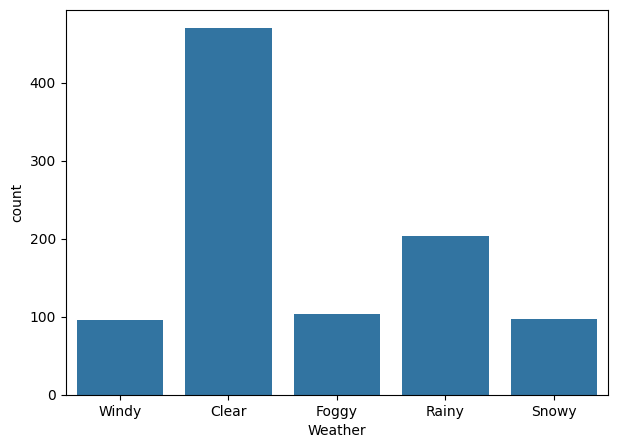

In [10]:
# Create graphical representation of qualitative columns
plt.figure(figsize=(7,5))
sns.countplot(data, x='Weather')

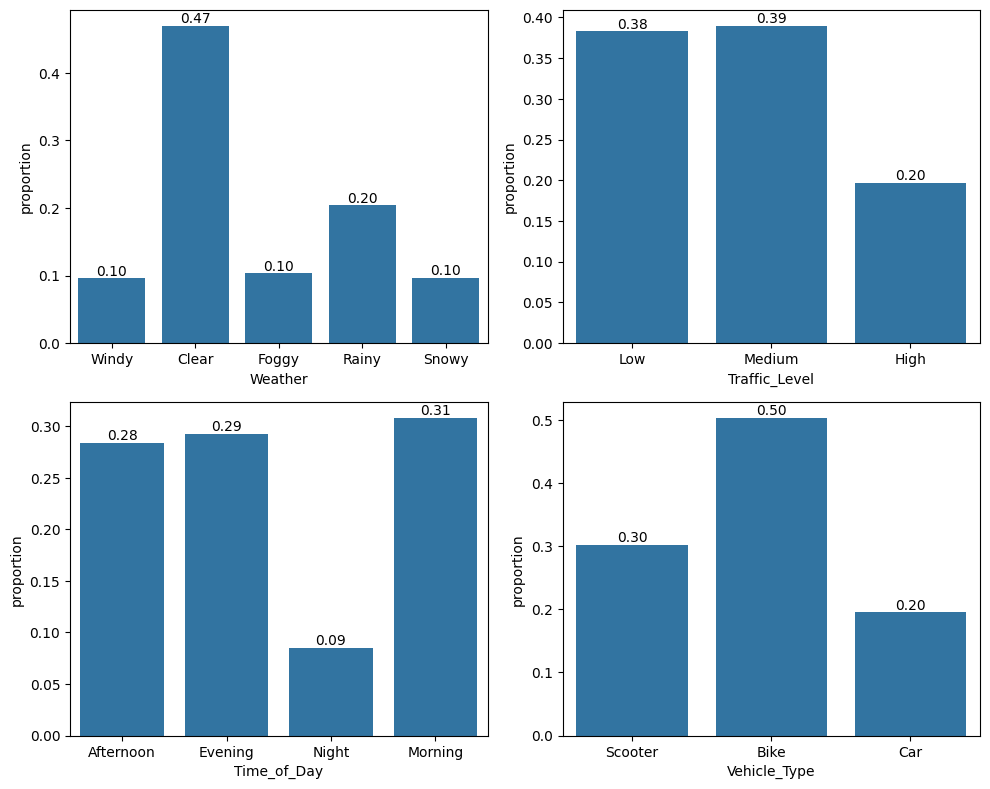

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, var in enumerate(data.select_dtypes(exclude='number').columns):
    sns.countplot(data, x=var, ax=ax[i // 2, i % 2], stat='proportion')
    ax[i // 2, i % 2].bar_label(ax[i // 2, i % 2].containers[0], fmt='%.2f')
plt.tight_layout()

### Explain each columns based on the viz
> - **Weather**: Clear weather takes a lead here by a landslide, following by rainy which accounts for 20%, and windy, foggy, and snowy weather occurs each at 10% 
> - **Trafic_Level**: low and medium traffic occurs about the same, although medium occurs the most, 39% of the time, beating low by 1%, while high only occurs 20% of the time.
> - **Time_of_Day**: Almost all orders happen during the morning, afternoon, and evening, sharing about the same proportion, while only 9% of customers order at night.
> - **Vechile_Type**: Half of the deliveries were done via Bike, followed by Scooter at 30% and the rest by Car.

**C. Quantitative variables:**

- Create statistical summary of quantiative columns.

- Create graphical representation of these quantitative columns to understand them better.

- Explain each column based on the stastical values and graphs.

- Are there any columns with outliers?

In [ ]:
# Create statistical summary of quantitative columns
# summary of quantitative data is just .describe()
data.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970.000000,1000.000000
mean,10.059970,16.982000,4.579381,56.732000
std,5.696656,7.204553,2.914394,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


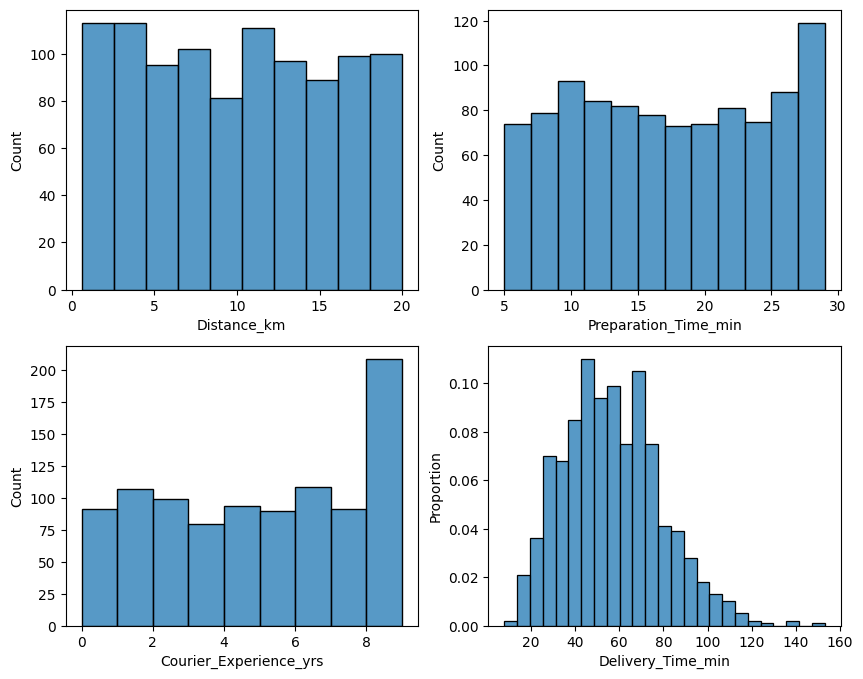

In [42]:
# Create graphical representation of quantitative columns
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, var in enumerate(data.select_dtypes(include='number').columns):
    if var in ['Distance_km', 'Preparation_Time_min']:
        sns.histplot(data=data, x=var, ax=ax[i // 2, i % 2], binwidth=2)
    elif var == 'Courier_Experience_yrs':
        sns.histplot(data=data, x=var, ax=ax[i // 2, i % 2], binwidth=1)
    else:
        sns.histplot(data=data, x=var, ax=ax[i // 2, i % 2], stat='proportion')
        # ax[i // 2, i % 2].bar_label(ax[i // 2, i % 2].containers[0], fmt='%.2f') # set label on top of each bar 


### Explain each columns based on the viz
>  - **Distance_km**: distance ranged from about 0.6km to 20km, with each bins of 2km, share about the same frequencies; although we can see that the most is at around 1-5km.
> - **Preparation_Time_min**: with bin width of 2mins, we can see that preparation times have little differences, ranging from 5mins to 28mins, although we can see that prep time hits a peak at 28-30mins.
> - **Courier_Experience_yrs**: we can also see that other drivers all have different years of experience ranging from 0 to 8; however, we can see that most drivers have an experience of 9 years with over 200 of them. Other groups of year of experience share about the same amount of drivers.
> - **Delivery_Time_min**: total delivery time mostly falls within 25 to 70 mins, with the most occurance being around 50 mins. Long delivery times over 80 mins occurs very little. 

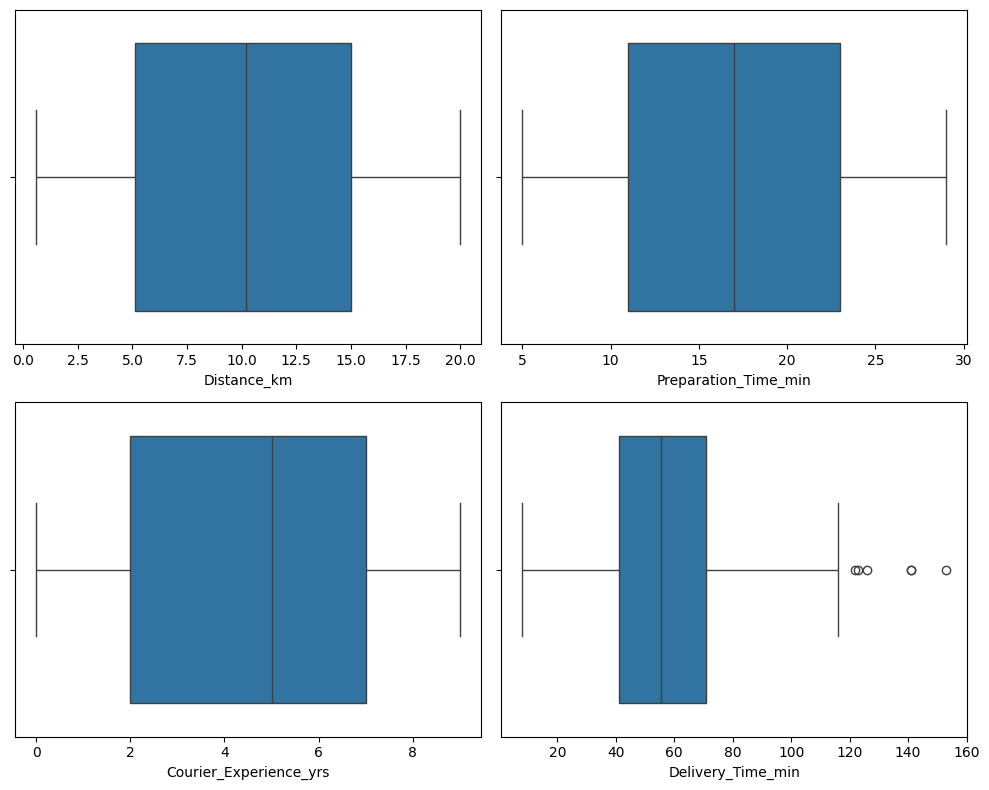

In [ ]:
# Finding outliers in the quantitative columns
    # Via box plots

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, var in enumerate(data.select_dtypes(include='number').columns):
    sns.boxplot(data=data, x=var, ax=ax[i // 2, i % 2])

plt.tight_layout()

> **Outliers**: It appears as though, there are outliers in the Delivery_Time_min column, ranging from a about 120 mins until a little under 160 mins. 

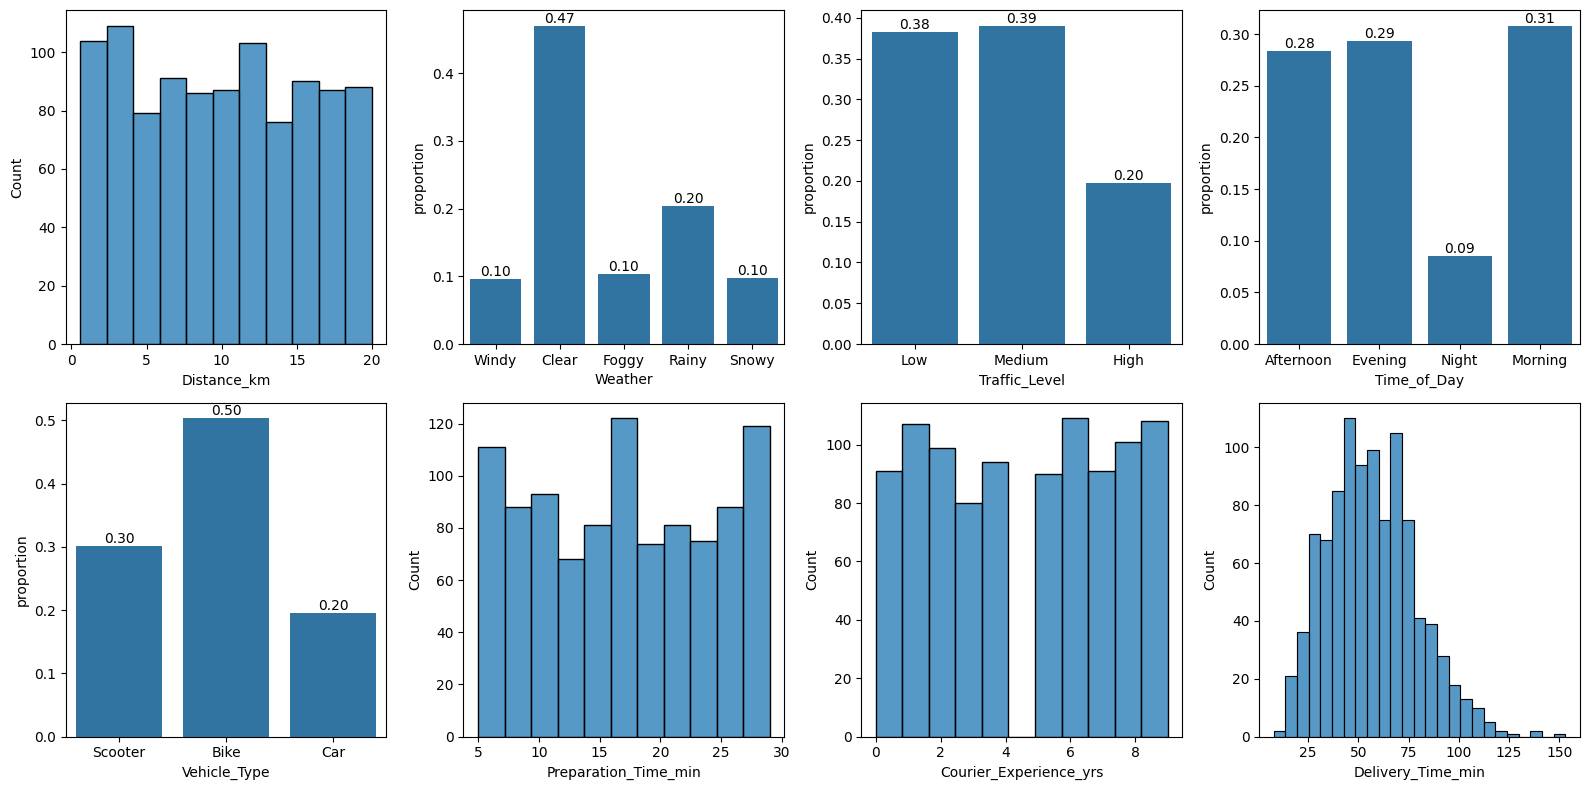

In [13]:
# All graphs
# fig=figure, ax=axes
fig, ax = plt.subplots(2, 4, figsize=(16,8)) # subplots of 2 rows, 4 columns, with each having 4x2 size

for i, var in enumerate(data.columns):
    if var in data.select_dtypes(include='number').columns:
        sns.histplot(data=data, x=var, ax=ax[i // 4, i % 4]) # ax[x, y] coordinates, starting from (0, 0) being the first graph
    else: # if the column is qualitative
        sns.countplot(data=data, x=var, ax=ax[i // 4, i % 4], stat='proportion') # normalizes the data so that the sum of the bar heights equals 1
        ax[i // 4, i % 4].bar_label(ax[i // 4, i % 4].containers[0], fmt='%.2f') # set label on top of each bar 
    plt.tight_layout()

## **2. Cardiovascular Disease dataset**

This dataset consists of 70 000 records of patients data, 11 features and a column of the presence or absence of cardiovascular disease. The data can be downloaded from kaggle using the following link: [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset).

**Task:** Analyze each column of the provided data by answering the questions listed in the previous section.

In [50]:
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

data = pd.read_csv(path + "/cardio_train.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Further Reading**

- `Pandas` python library: [https://pandas.pydata.org/docs/getting_started/index.html#getting-started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

- `Pandas Cheatsheet`: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- `10 Minute to Pandas`: [https://pandas.pydata.org/docs/user_guide/10min.html](https://pandas.pydata.org/docs/user_guide/10min.html)

- `Some Pandas Lession`: [https://www.kaggle.com/learn/pandas](https://pandas.pydata.org/docs/user_guide/10min.html)